# Group 4 - Avengers

## Data Cleaning on Restaurant Expenditure Analysis

In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir("C:\\Users\\satya\\Documents\\SEM 3 - SPRING 24\\CAPSTONE\EDA")
df =pd.read_excel('RES _ EDA FINAL MASTER DATA.xlsx')

In [3]:
df.head()

,NEWID,AGE_REF,SEX,FAM_SIZE,STATE CODE,STATE NAME,No of Income Earners,Family Income after Taxes,Family Income Before Taxes,Expenditures this quarter,Food at home this quarter,Hours worked by spouse per week,Total Amount spent(outlays major),MARRIED,NEVER MARRIED,MARRIED WITH CHILDREN,DIVORCED,SEPERATED,Food Away From Last Quarter (FDAWAYPQ),Fast food places during out of town(TFOODAWC)
0,5011064,87,Female,3,37.0,Oklahoma,1,57240.2,1979,10669.1001,2212.0,NaN,10806.10,0,0,1,0,0,931.0,0
1,5011134,73,Female,2,36.0,Ohio,0,55570.0,48970,11434.2500,1690.0,NaN,11434.25,1,0,0,0,0,0.0,0
2,5011244,47,Female,2,39.0,Pennsylvania,2,145387.0,172600,24199.7501,1300.0,50.0,28727.75,1,0,0,0,0,1140.0,0
3,5011314,82,Female,1,20.0,Maine,0,10082.0,7332,8025.0000,910.0,NaN,8025.00,0,0,1,0,0,780.0,0
4,5011334,87,Male,2,8.0,Delaware,0,50481.0,43807,9367.0000,1196.0,NaN,88685.00,1,0,0,0,0,650.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4807 entries, 0 to 4806
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   NEWID                                          4807 non-null   int64  
 1   AGE_REF                                        4807 non-null   int64  
 2   SEX                                            4807 non-null   object 
 3   FAM_SIZE                                       4807 non-null   int64  
 4   STATE CODE                                     4415 non-null   float64
 5   STATE NAME                                     4176 non-null   object 
 6   No of Income Earners                           4807 non-null   int64  
 7   Family Income after Taxes                      4807 non-null   float64
 8   Family Income Before Taxes                     4807 non-null   int64  
 9   Expenditures this quarter                      4807 

## Handling Missing Values

### Columns with Missing Values

In [5]:
df.isnull().sum()   #finding missing values using isnull function

NEWID                                               0
AGE_REF                                             0
SEX                                                 0
FAM_SIZE                                            0
STATE CODE                                        392
STATE NAME                                        631
No of Income Earners                                0
Family Income after Taxes                           0
Family Income Before Taxes                          0
Expenditures this quarter                           0
Food at home this quarter                           0
Hours worked by spouse per week                  3280
Total Amount spent(outlays major)                   0
MARRIED                                             0
NEVER MARRIED                                       0
MARRIED WITH CHILDREN                               0
DIVORCED                                            0
SEPERATED                                           0
Food Away From Last Quarter 

### Visual representation of missing values in heat map before data cleaning

<Axes: >

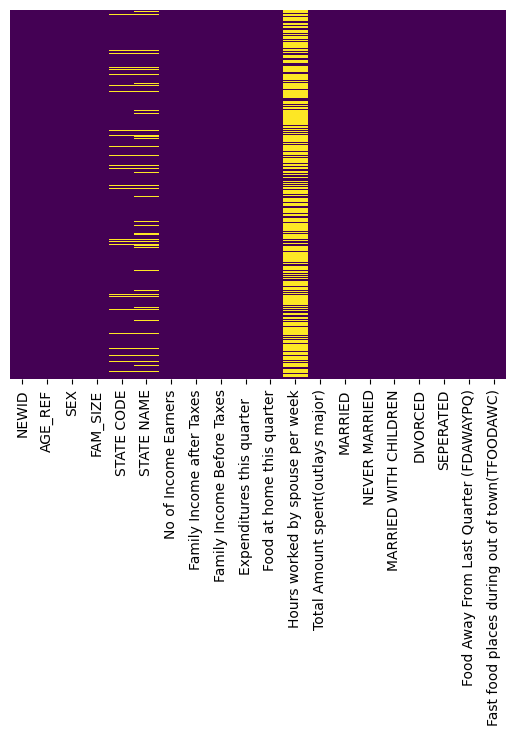

In [6]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

### Handling missing values for Hourse worked by spouse per week


In [7]:
#dropping column hours worked by spouse 
#because it has more than 50% of its data as null values

df.drop("Hours worked by spouse per week", axis=1, inplace=True) 

In [8]:
new_missing_values = df.isnull().sum()
print("Missing values in the dataset", new_missing_values)

Missing values in the dataset NEWID                                              0
AGE_REF                                            0
SEX                                                0
FAM_SIZE                                           0
STATE CODE                                       392
STATE NAME                                       631
No of Income Earners                               0
Family Income after Taxes                          0
Family Income Before Taxes                         0
Expenditures this quarter                          0
Food at home this quarter                          0
Total Amount spent(outlays major)                  0
MARRIED                                            0
NEVER MARRIED                                      0
MARRIED WITH CHILDREN                              0
DIVORCED                                           0
SEPERATED                                          0
Food Away From Last Quarter (FDAWAYPQ)             0
Fast food places

### Handling missing values for state code and State name

In [9]:
# Replacing 'N/A' values in the 'state name' column with the corresponding state codes as defined in the data dictionary.

df.loc[df['STATE CODE'] == 53, 'STATE NAME'] = 'Washington'
df.loc[df['STATE CODE'] == 54, 'STATE NAME'] = 'Virginia'
df.loc[df['STATE CODE'] == 55, 'STATE NAME'] = 'Wisconsin'

In [10]:
State_missing_values = df.isnull().sum()
print("Missing values in the dataset", State_missing_values)

Missing values in the dataset NEWID                                              0
AGE_REF                                            0
SEX                                                0
FAM_SIZE                                           0
STATE CODE                                       392
STATE NAME                                       392
No of Income Earners                               0
Family Income after Taxes                          0
Family Income Before Taxes                         0
Expenditures this quarter                          0
Food at home this quarter                          0
Total Amount spent(outlays major)                  0
MARRIED                                            0
NEVER MARRIED                                      0
MARRIED WITH CHILDREN                              0
DIVORCED                                           0
SEPERATED                                          0
Food Away From Last Quarter (FDAWAYPQ)             0
Fast food places

In [11]:
# Fill missing values (empty cells) in the 'STATE CODE' and 'STATE NAME' columns with the preceding non-null value along the respective columns.
df[['STATE CODE', 'STATE NAME']] = df[['STATE CODE', 'STATE NAME']].fillna(method='ffill')

In [12]:
#verifying missing values in columns
df.isnull().sum()

NEWID                                            0
AGE_REF                                          0
SEX                                              0
FAM_SIZE                                         0
STATE CODE                                       0
STATE NAME                                       0
No of Income Earners                             0
Family Income after Taxes                        0
Family Income Before Taxes                       0
Expenditures this quarter                        0
Food at home this quarter                        0
Total Amount spent(outlays major)                0
MARRIED                                          0
NEVER MARRIED                                    0
MARRIED WITH CHILDREN                            0
DIVORCED                                         0
SEPERATED                                        0
Food Away From Last Quarter (FDAWAYPQ)           0
Fast food places during out of town(TFOODAWC)    0
dtype: int64

### Visual representation of missing values in heat map after data cleaning

<Axes: >

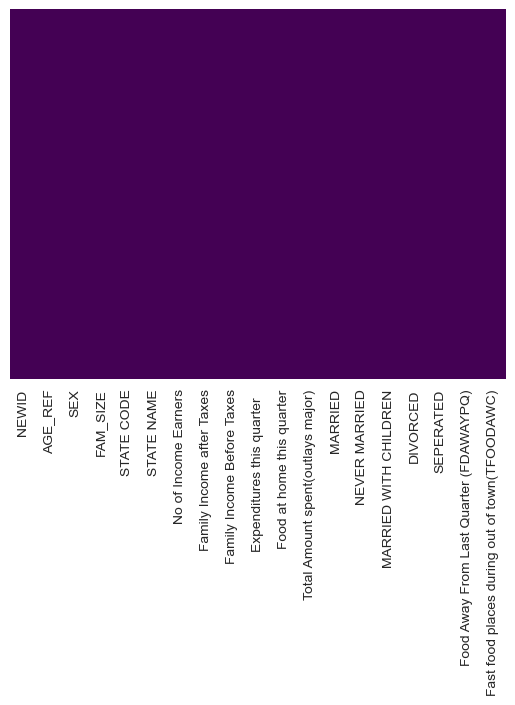

In [33]:
# Visualize missing values in the DataFrame using a heatmap with 'viridis' colormap, 
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

## Handling Negative values in the columns

In [14]:
numeric_columns = df.select_dtypes(include='number').columns

# Check for negative values in each numeric column
for column in numeric_columns:
    has_negative = (df[column] < 0).any()
    if has_negative:
        print(f"Column '{column}' has negative values.")

Column 'Family Income after Taxes' has negative values.
Column 'Family Income Before Taxes' has negative values.


In [15]:
df.loc[df['Family Income after Taxes'] < 0 ,'Family Income after Taxes'] = 0
df.loc[df['Family Income Before Taxes'] < 0 ,'Family Income Before Taxes'] = 0

## Handling Outliers

In [16]:
def calculate_numerical_outliers(column):
    if pd.api.types.is_numeric_dtype(column):
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = column[(column < lower_bound) | (column > upper_bound)]
        return outliers
    else:
        return pd.Series([])

def calculate_numerical_outlier_percentage(df):
    outlier_percentage = {}
    for column in df.columns:
        outliers = calculate_numerical_outliers(df[column])
        if not outliers.empty:
            outlier_percentage[column] = len(outliers) / len(df[column]) * 100
    return outlier_percentage

outlier_percentage = calculate_numerical_outlier_percentage(df)

C:\Users\satya\AppData\Local\Temp\ipykernel_4480\2691619410.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series([])


In [17]:
# Outliers percentage for each feature

for column, percentage in {key: value for key, value in outlier_percentage.items() if value != 0.0}.items():
     print(f"{column}: {percentage:.2f}%")

FAM_SIZE: 1.46%
No of Income Earners: 0.04%
Family Income after Taxes: 5.30%
Family Income Before Taxes: 5.37%
Expenditures this quarter  : 6.76%
Food at home this quarter: 4.64%
Total Amount spent(outlays major): 5.51%
NEVER MARRIED: 22.13%
MARRIED WITH CHILDREN: 10.17%
DIVORCED: 15.31%
SEPERATED: 2.10%
Food Away From Last Quarter (FDAWAYPQ): 6.51%
Fast food places during out of town(TFOODAWC): 9.61%


In [18]:
def replace_outliers_with_percentile(series, percentile=95):
    percentile_value = series.quantile(percentile / 100)
    std_dev = series.std()
    outlier_threshold = 3  # Defining the threshold for detecting outliers 3 standard deviations away from the mean
    lower_bound = percentile_value - outlier_threshold * std_dev
    upper_bound = percentile_value + outlier_threshold * std_dev
    return series.apply(lambda x: percentile_value if x < lower_bound or x > upper_bound else x)

# Apply the function to numerical columns only
df_numerical = df.select_dtypes(include='number')
df_numerical = df_numerical.apply(replace_outliers_with_percentile, percentile=95)

# Update the original DataFrame with the modified numerical columns
df[df_numerical.columns] = df_numerical


In [19]:
def calculate_numerical_outliers(column):
    if pd.api.types.is_numeric_dtype(column):
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = column[(column < lower_bound) | (column > upper_bound)]
        return outliers
    else:
        return pd.Series([])

def calculate_numerical_outlier_percentage(df_numerical):
    outlier_percentage = {}
    for column in df_numerical.columns:
        outliers = calculate_numerical_outliers(df_numerical[column])
        if not outliers.empty:
            outlier_percentage[column] = len(outliers) / len(df_numerical[column]) * 100
    return outlier_percentage

outlier_percentage = calculate_numerical_outlier_percentage(df_numerical)

In [20]:

# Defining the file path for the cleaned dataset
output_file_path = "C:\\Users\\satya\\Documents\\SEM 3 - SPRING 24\\CAPSTONE\\Data Cleaning\\newcleaned_RES_dataset.xlsx"

# Save the cleaned DataFrame to an Excel file
df.to_excel(output_file_path, index=False)

print(f"Cleaned dataset saved to: {output_file_path}")


Cleaned dataset saved to: C:\Users\satya\Documents\SEM 3 - SPRING 24\CAPSTONE\Data Cleaning\newcleaned_RES_dataset.xlsx


In [21]:
new_df = pd.read_excel("C:\\Users\\satya\\Documents\\SEM 3 - SPRING 24\\CAPSTONE\\Data Cleaning\\cleaned_RES_dataset.xlsx")

In [22]:
# Remove leading and trailing whitespaces from column names in the DataFrame 'new_df'.
new_df.columns = new_df.columns.str.strip()


In [23]:
new_df.describe()

,NEWID,AGE_REF,FAM_SIZE,STATE CODE,No of Income Earners,Family Income after Taxes,Family Income Before Taxes,Expenditures this quarter,Food at home this quarter,Total Amount spent(outlays major),MARRIED,NEVER MARRIED,MARRIED WITH CHILDREN,DIVORCED,SEPERATED,Food Away From Last Quarter (FDAWAYPQ),Fast food places during out of town(TFOODAWC)
count,4.807000e+03,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.0,4807.000000,4807.0,4807.000000,4807.000000
mean,5.165009e+06,59.210942,2.330560,28.473060,1.249428,109310.228138,84920.954649,12135.822944,1365.367728,12329.275564,0.499688,0.221344,1.0,0.153110,0.0,575.806879,19.477637
std,9.341853e+04,16.790167,1.407114,16.388365,0.997910,81011.126127,88567.961982,10774.327088,1010.139961,10201.576215,0.500052,0.415195,0.0,0.360131,0.0,718.965914,76.551609
min,5.011064e+06,29.000000,1.000000,4.000000,0.000000,17948.000000,0.000000,20.000000,182.000000,20.000000,0.000000,0.000000,1.0,0.000000,0.0,0.000000,0.000000
25%,5.095433e+06,45.000000,1.000000,12.000000,0.000000,46906.200000,24164.500000,4944.575050,606.666700,5155.958500,0.000000,0.000000,1.0,0.000000,0.0,94.333300,0.000000
50%,5.207302e+06,60.000000,2.000000,29.000000,1.000000,82817.000000,57700.000000,8961.000000,1055.000000,9362.427000,0.000000,0.000000,1.0,0.000000,0.0,346.666700,0.000000
75%,5.254916e+06,73.000000,3.000000,42.000000,2.000000,145576.700000,117000.000000,15491.958300,1820.000000,16247.900000,1.000000,0.000000,1.0,0.000000,0.0,780.000000,0.000000
max,5.286191e+06,87.000000,9.000000,55.000000,6.000000,454894.700000,557358.000000,77549.000100,6240.000000,73277.355000,1.000000,1.000000,1.0,1.000000,0.0,5200.000000,700.000000


## Distribution of dependent and independent variables

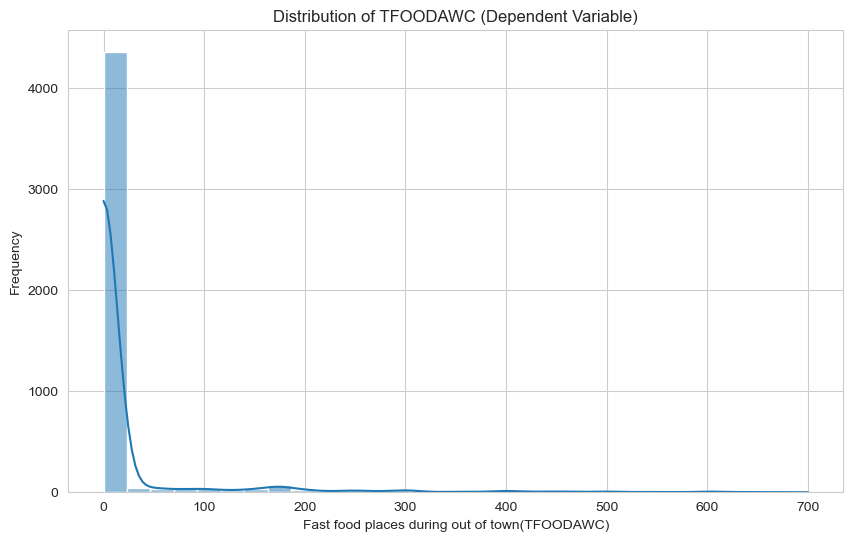

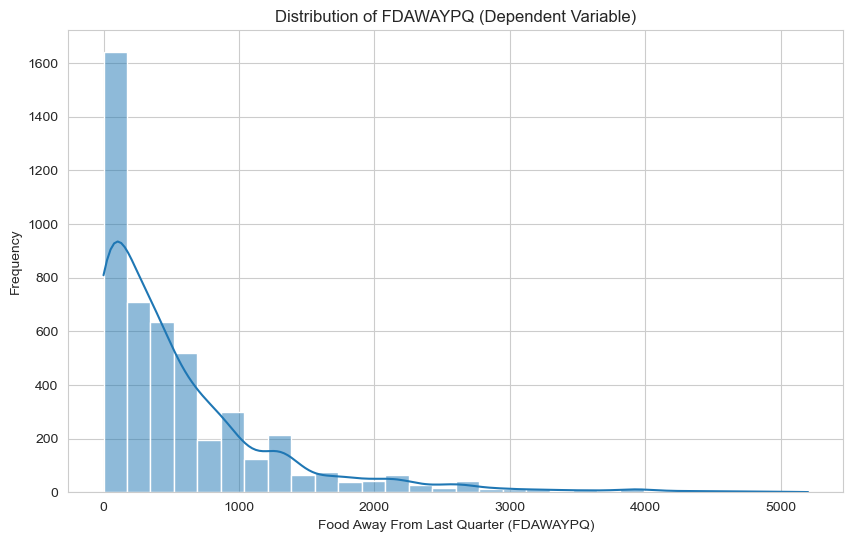

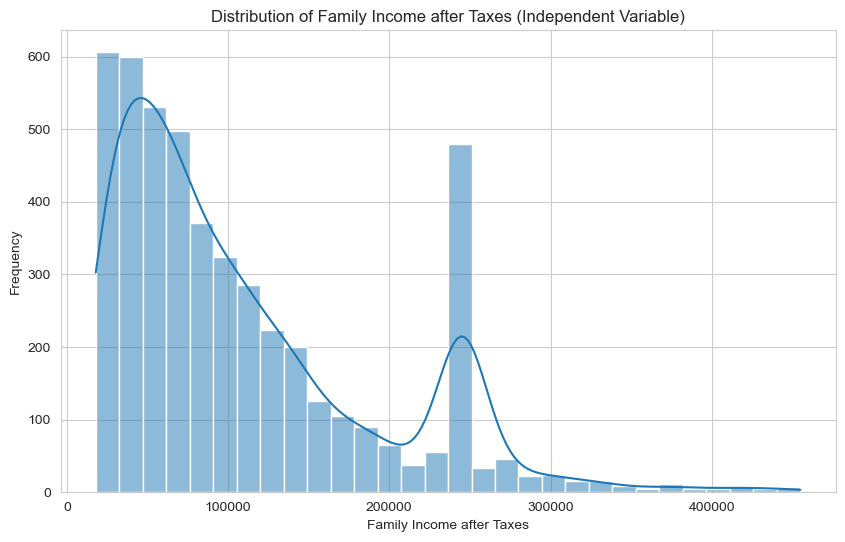

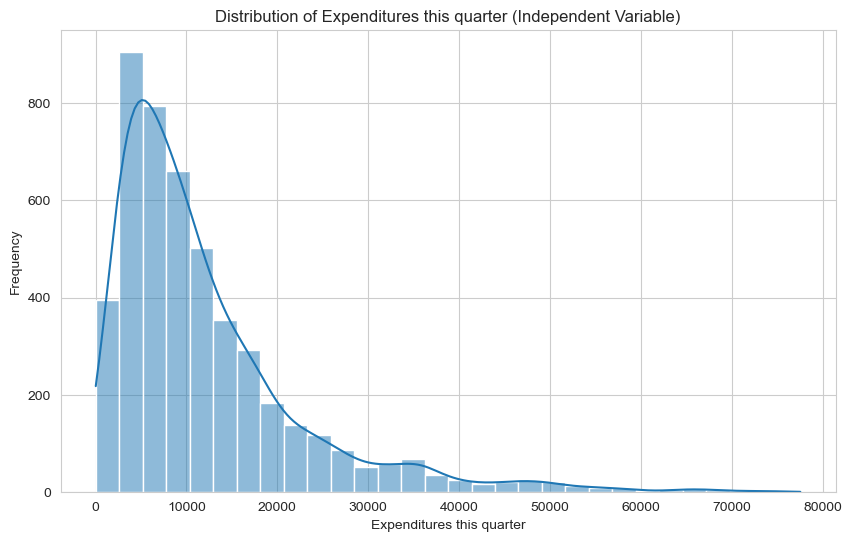

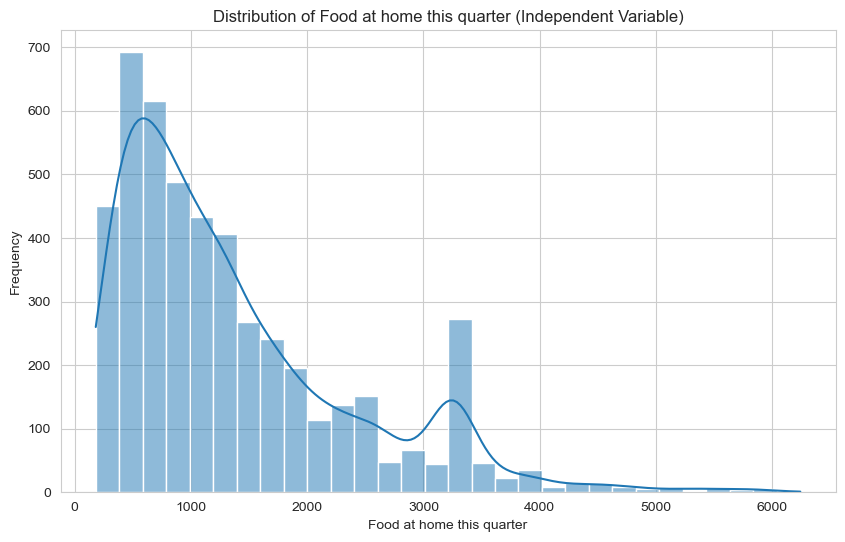

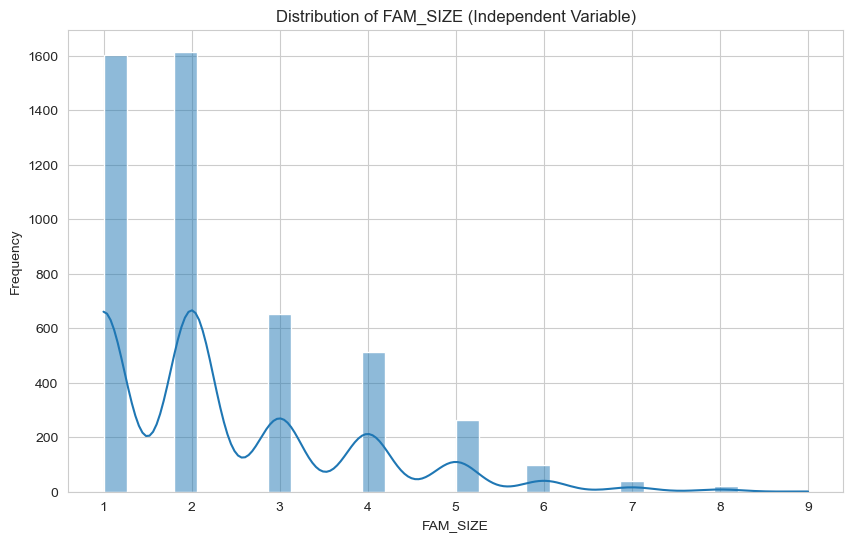

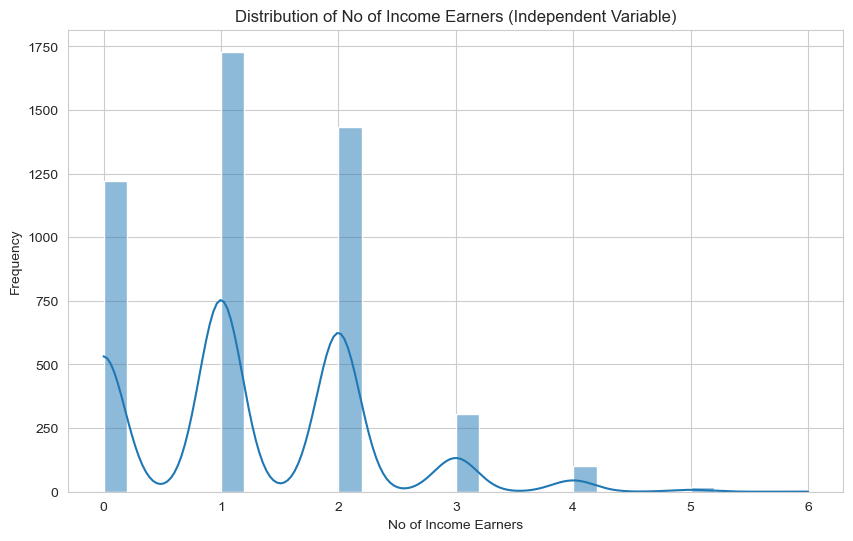

In [24]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Defining a function to create distribution plots for variables
def plot_distribution(data, column, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plot distribution of the dependent variables including outliers
plot_distribution(new_df, 'Fast food places during out of town(TFOODAWC)', 'Distribution of TFOODAWC (Dependent Variable)')
plot_distribution(new_df, 'Food Away From Last Quarter (FDAWAYPQ)', 'Distribution of FDAWAYPQ (Dependent Variable)')

# Choosing few important independent variables to visualize.
important_independent_vars = ['Family Income after Taxes', 'Expenditures this quarter', 'Food at home this quarter', 'FAM_SIZE', 'No of Income Earners']
  

for var in important_independent_vars:
    plot_distribution(new_df, var, f'Distribution of {var} (Independent Variable)')


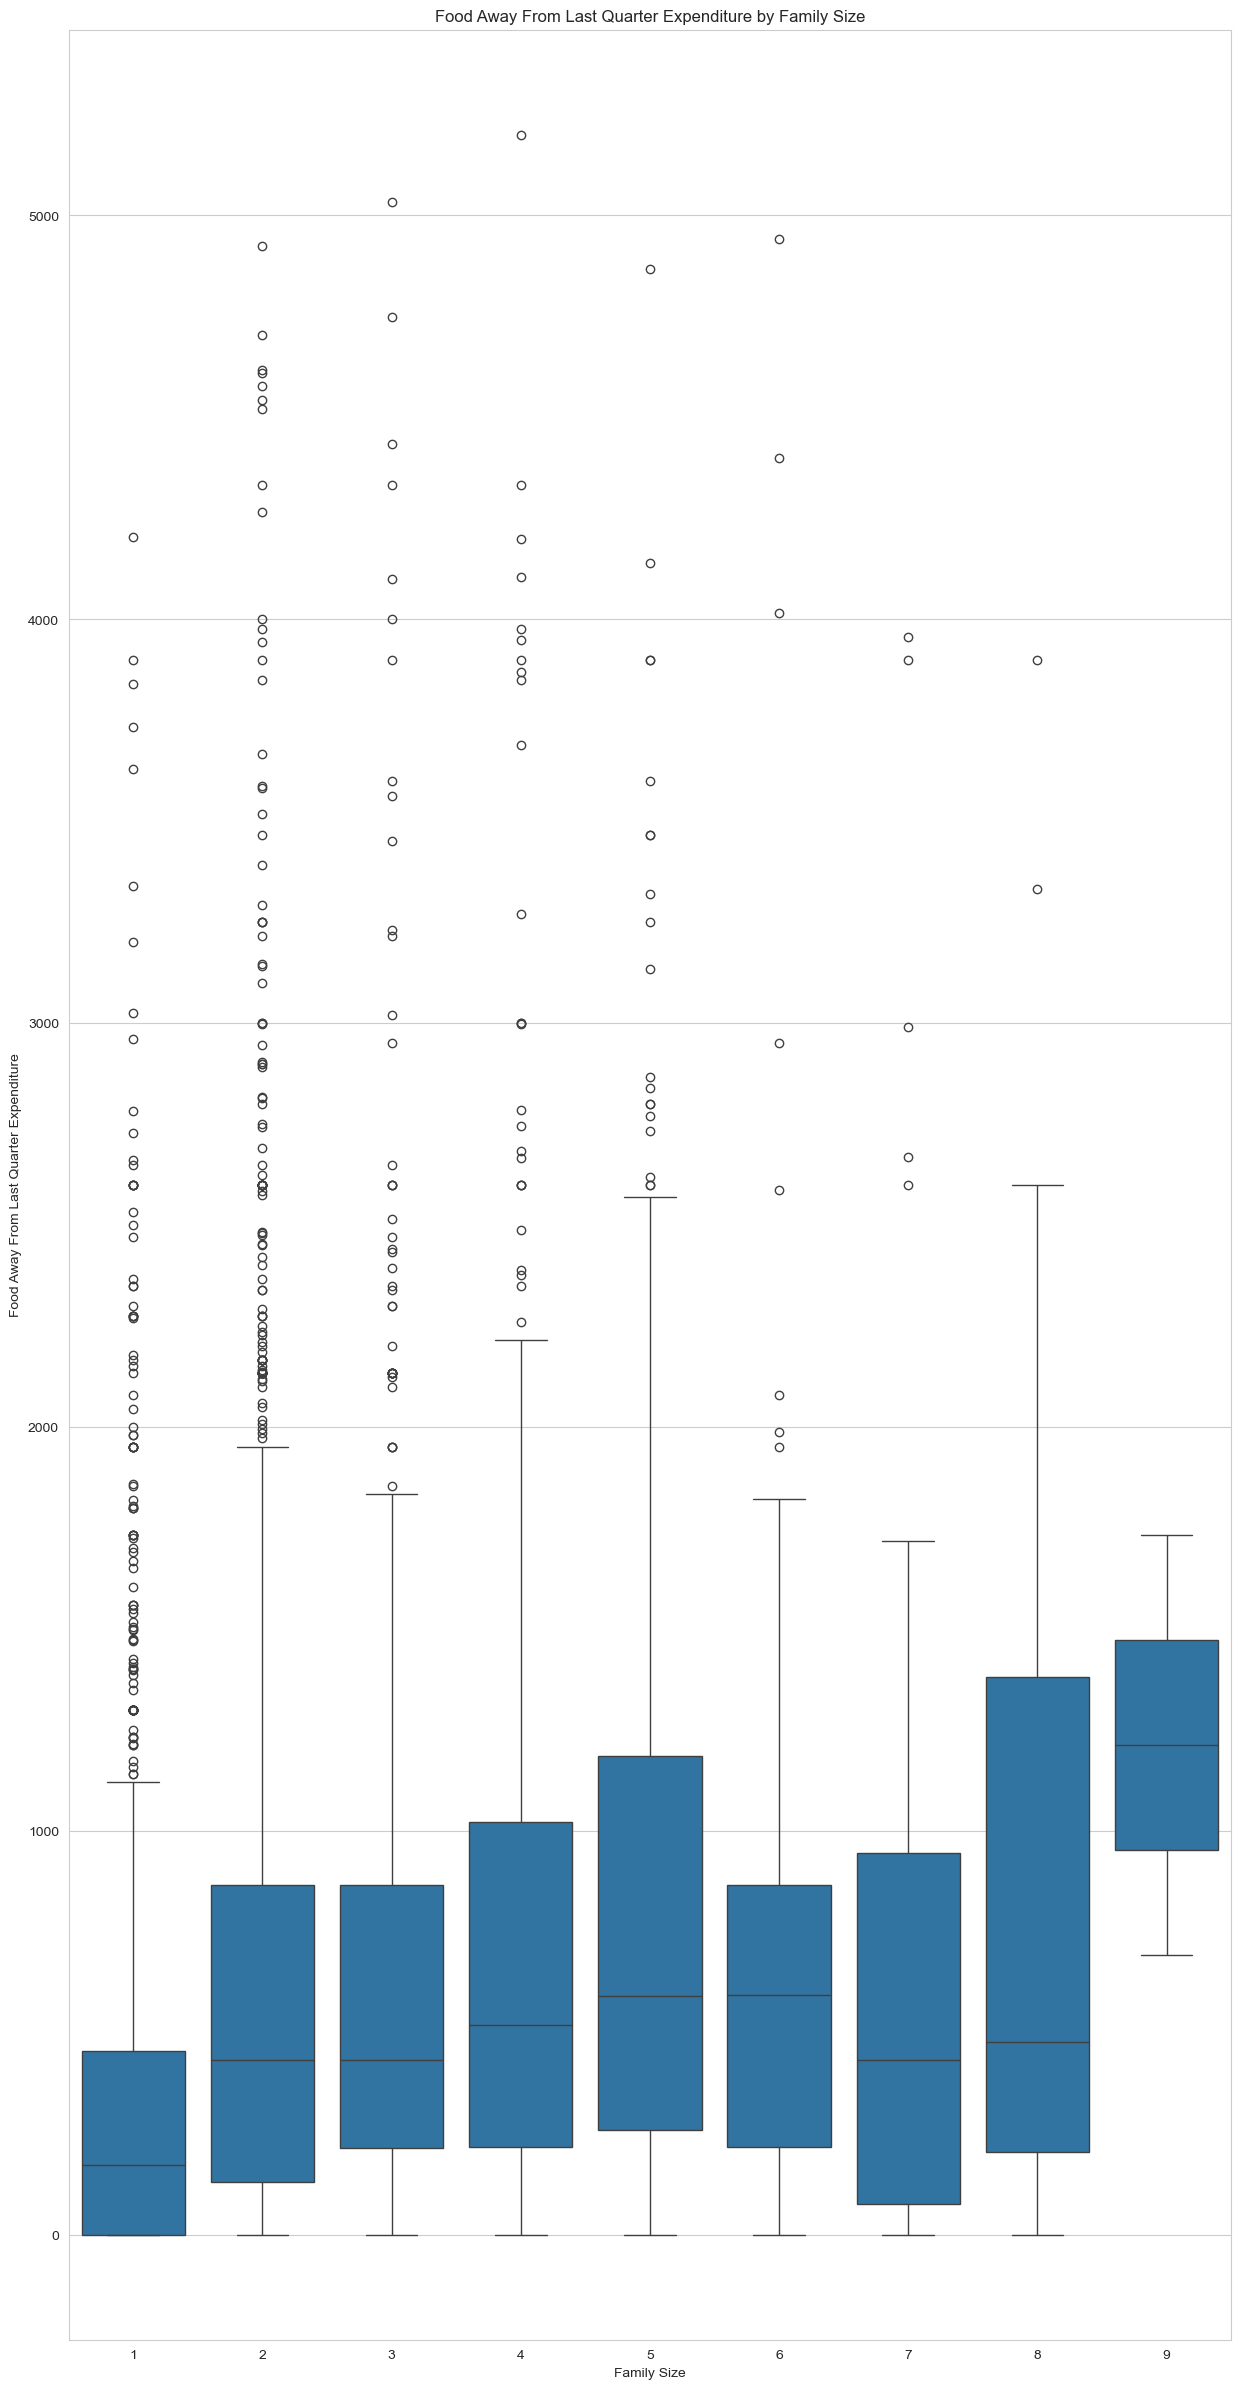

In [25]:
# Box plot for Food Away From Last Quarter (FDAWAYPQ) vs. Family Size
plt.figure(figsize=(15, 30))
sns.boxplot(x='FAM_SIZE', y='Food Away From Last Quarter (FDAWAYPQ)', data=new_df)
plt.title('Food Away From Last Quarter Expenditure by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Food Away From Last Quarter Expenditure')
plt.show()

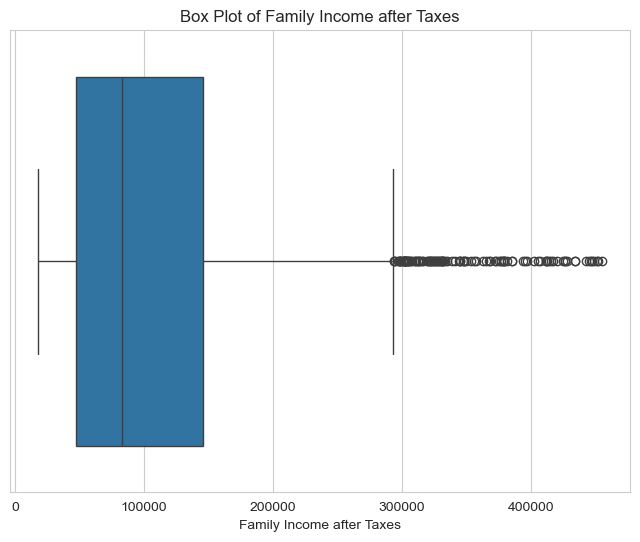

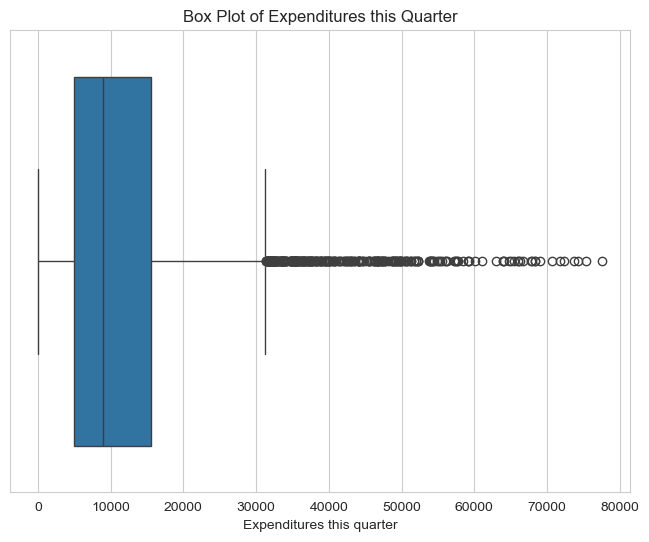

In [26]:
# Box plot for 'Family Income after Taxes'
plt.figure(figsize=(8, 6))
sns.boxplot(x=new_df['Family Income after Taxes'])
plt.title('Box Plot of Family Income after Taxes')
plt.show()

# Box plot for 'Expenditures this quarter'
plt.figure(figsize=(8, 6))
sns.boxplot(x=new_df['Expenditures this quarter'])
plt.title('Box Plot of Expenditures this Quarter')
plt.show()



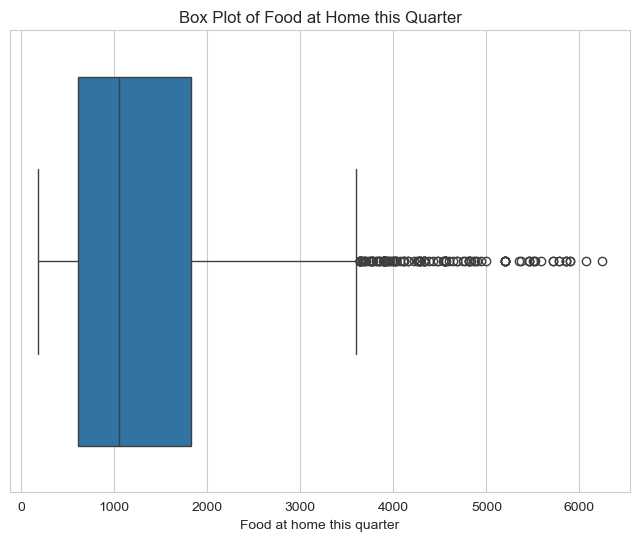

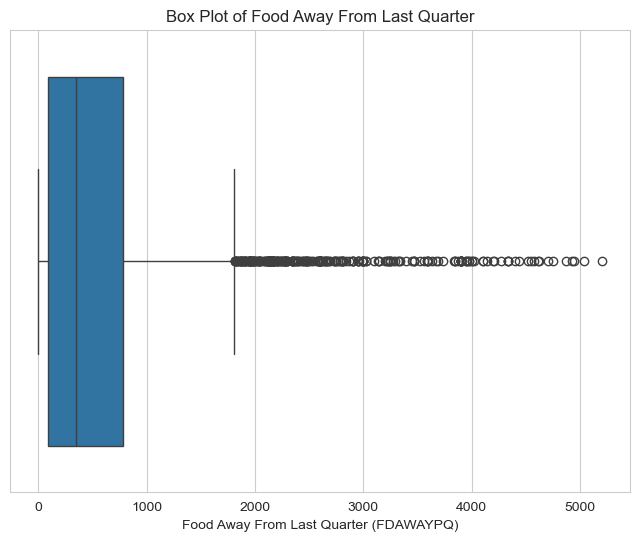

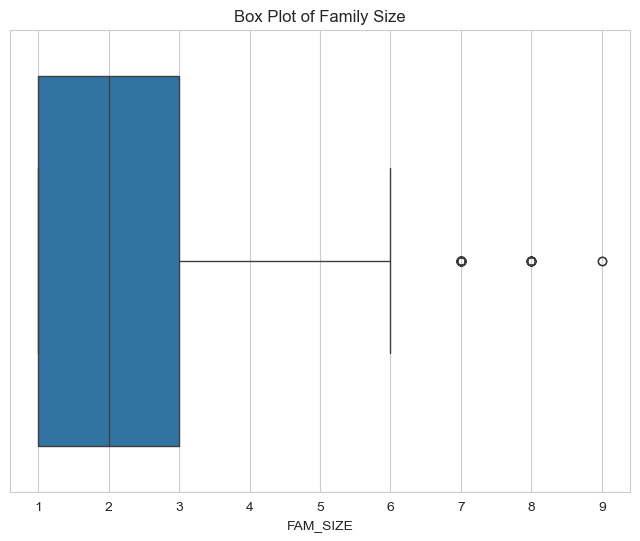

In [27]:
# Box plot for 'Food at home this quarter'
plt.figure(figsize=(8, 6))
sns.boxplot(x=new_df['Food at home this quarter'])
plt.title('Box Plot of Food at Home this Quarter')
plt.show()


# Box plot for 'Food Away From Last Quarter (FDAWAYPQ)'
plt.figure(figsize=(8, 6))
sns.boxplot(x=new_df['Food Away From Last Quarter (FDAWAYPQ)'])
plt.title('Box Plot of Food Away From Last Quarter')
plt.show()


# Box plot for 'FAM_SIZE'
plt.figure(figsize=(8, 6))
sns.boxplot(x=new_df['FAM_SIZE'])
plt.title('Box Plot of Family Size')
plt.show()

In [28]:
# Generating a correlation matrix as a DataFrame
corr_matrix = new_df.corr()
corr_matrix

,NEWID,AGE_REF,FAM_SIZE,STATE CODE,No of Income Earners,Family Income after Taxes,Family Income Before Taxes,Expenditures this quarter,Food at home this quarter,Total Amount spent(outlays major),MARRIED,NEVER MARRIED,MARRIED WITH CHILDREN,DIVORCED,SEPERATED,Food Away From Last Quarter (FDAWAYPQ),Fast food places during out of town(TFOODAWC)
NEWID,1.000000,-0.009456,-0.005531,0.014058,0.003044,-0.010113,-0.021723,-0.035934,-0.038204,-0.050590,-0.010514,0.008032,NaN,0.015087,NaN,-0.034430,0.016730
AGE_REF,-0.009456,1.000000,-0.366077,0.001857,-0.389468,-0.116204,-0.242738,-0.161626,-0.112403,-0.176049,-0.161971,-0.053918,NaN,0.052021,NaN,-0.170531,-0.074903
FAM_SIZE,-0.005531,-0.366077,1.000000,0.002881,0.607051,0.175217,0.277755,0.243670,0.288117,0.278808,0.490292,-0.231397,NaN,-0.211582,NaN,0.199480,0.043691
STATE CODE,0.014058,0.001857,0.002881,1.000000,-0.013107,-0.030868,-0.025806,-0.042905,-0.057044,-0.059701,0.012078,-0.032088,NaN,0.028550,NaN,-0.055067,-0.025792
No of Income Earners,0.003044,-0.389468,0.607051,-0.013107,1.000000,0.246800,0.407105,0.304441,0.197532,0.341324,0.350623,-0.059456,NaN,-0.174608,NaN,0.256684,0.096711
Family Income after Taxes,-0.010113,-0.116204,0.175217,-0.030868,0.246800,1.000000,0.547254,0.323209,0.150392,0.365110,0.192580,-0.098008,NaN,-0.073980,NaN,0.258619,0.119335
Family Income Before Taxes,-0.021723,-0.242738,0.277755,-0.025806,0.407105,0.547254,1.000000,0.486045,0.166974,0.545405,0.337235,-0.143227,NaN,-0.131530,NaN,0.392970,0.184996
Expenditures this quarter,-0.035934,-0.161626,0.243670,-0.042905,0.304441,0.323209,0.486045,1.000000,0.411549,0.913643,0.277979,-0.136854,NaN,-0.113587,NaN,0.549289,0.028342
Food at home this quarter,-0.038204,-0.112403,0.288117,-0.057044,0.197532,0.150392,0.166974,0.411549,1.000000,0.451415,0.174815,-0.092423,NaN,-0.079632,NaN,0.301536,-0.045302
Total Amount spent(outlays major),-0.050590,-0.176049,0.278808,-0.059701,0.341324,0.365110,0.545405,0.913643,0.451415,1.000000,0.309365,-0.157524,NaN,-0.120869,NaN,0.596418,0.036018


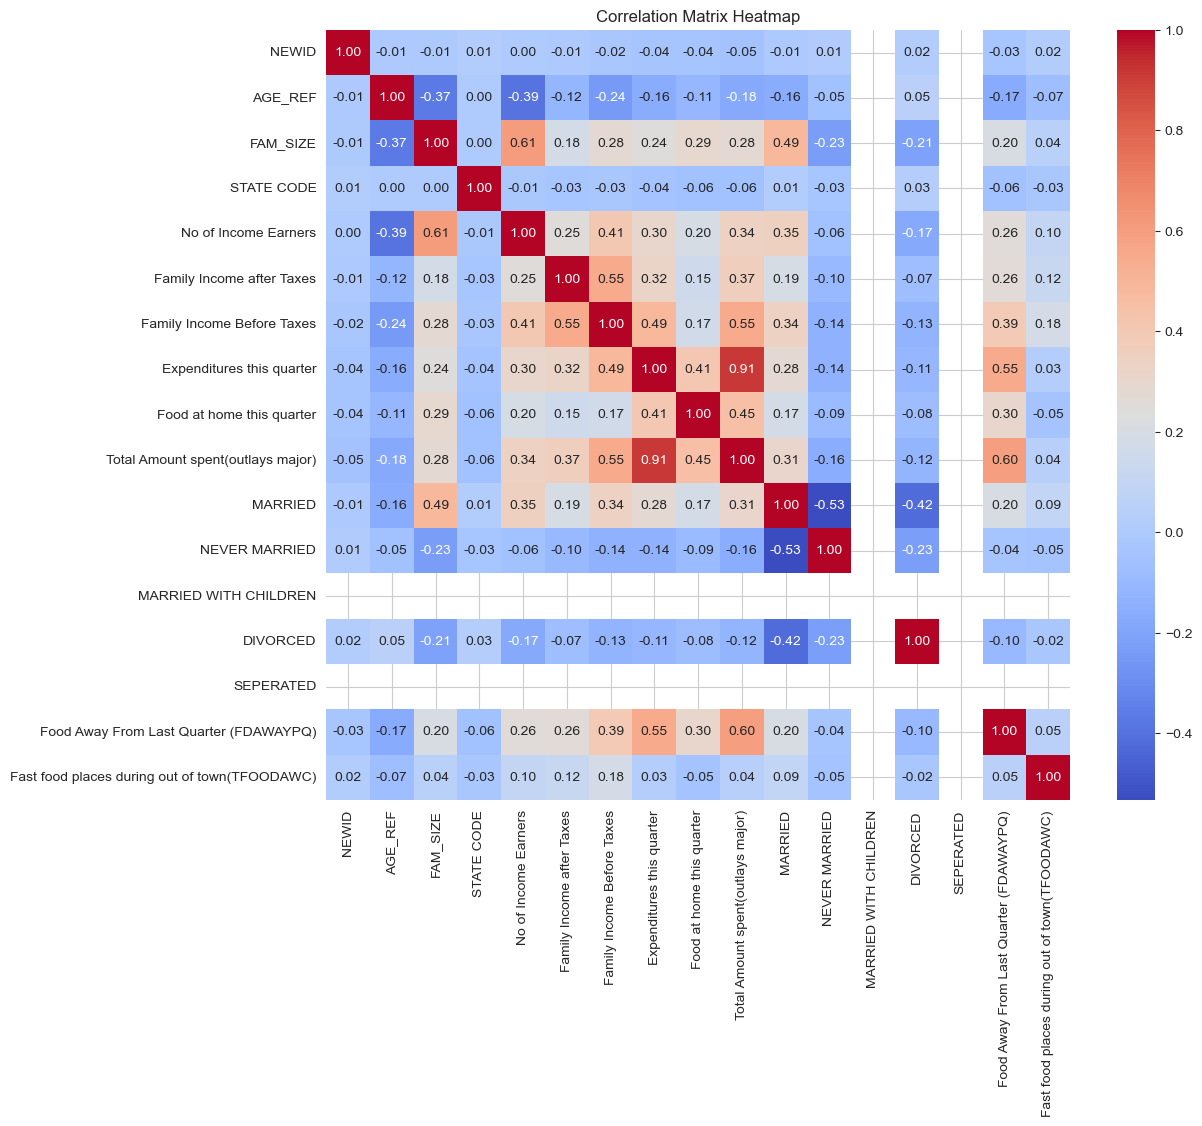

In [29]:
# Correlation Matrix

corr_matrix = new_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


## Summary visuals 


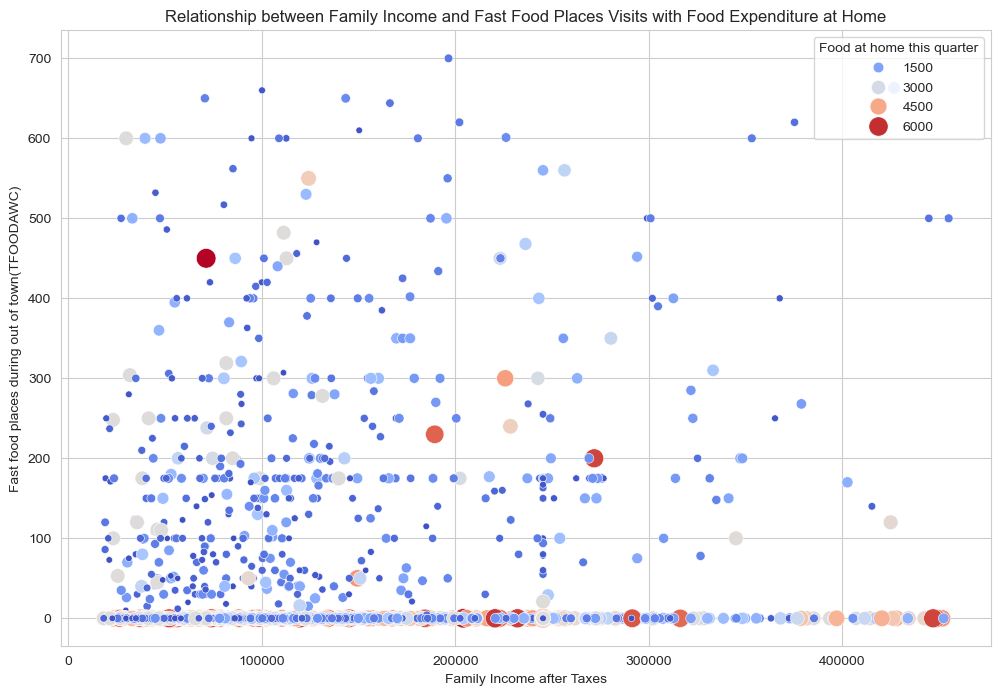

In [30]:
# Creating a scatter plot to show the relationship between family income and fast food places visits,
# with the hue indicating food at home expenditure

plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(data=new_df, x='Family Income after Taxes', y='Fast food places during out of town(TFOODAWC)',
                               size='Food at home this quarter', hue='Food at home this quarter', palette="coolwarm", sizes=(20, 200))
plt.title('Relationship between Family Income and Fast Food Places Visits with Food Expenditure at Home')
plt.xlabel('Family Income after Taxes')
plt.ylabel('Fast food places during out of town(TFOODAWC)')
plt.legend(title='Food at home this quarter', loc='upper right')
plt.show()


## pair plots

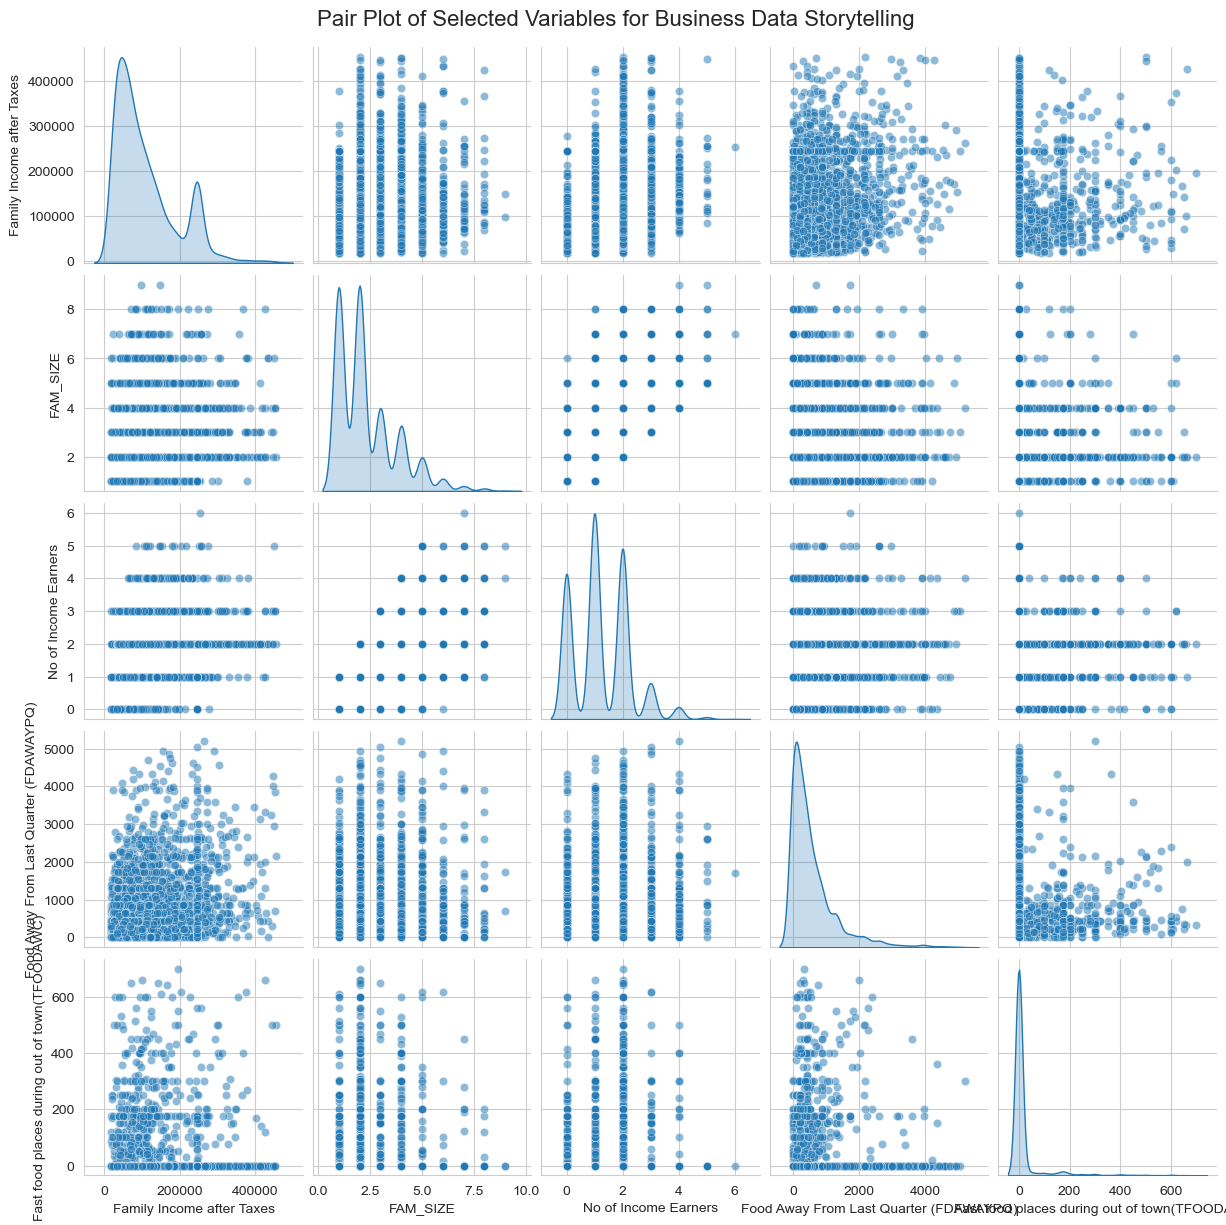

In [31]:
# For data storytelling, we will create a pair plot for the selected variables including the dependent variable
# This will help to visualize the interactions between them

# Selecting the variables for the pair plot
storytelling_vars = [
    'Family Income after Taxes',
    'FAM_SIZE',
    'No of Income Earners',
    'Food Away From Last Quarter (FDAWAYPQ)',
    'Fast food places during out of town(TFOODAWC)'
]

# Creating the pair plot
pair_plot_data = new_df[storytelling_vars]
sns.pairplot(pair_plot_data, kind='scatter', diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pair Plot of Selected Variables for Business Data Storytelling', size=16)
plt.subplots_adjust(top=0.95)
plt.show()


C:\Users\satya\AppData\Local\Temp\ipykernel_4480\2975794557.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_data = new_df.groupby(income_brackets)['Fast food places during out of town(TFOODAWC)', 'Food Away From Last Quarter (FDAWAYPQ)'].mean().reset_index()


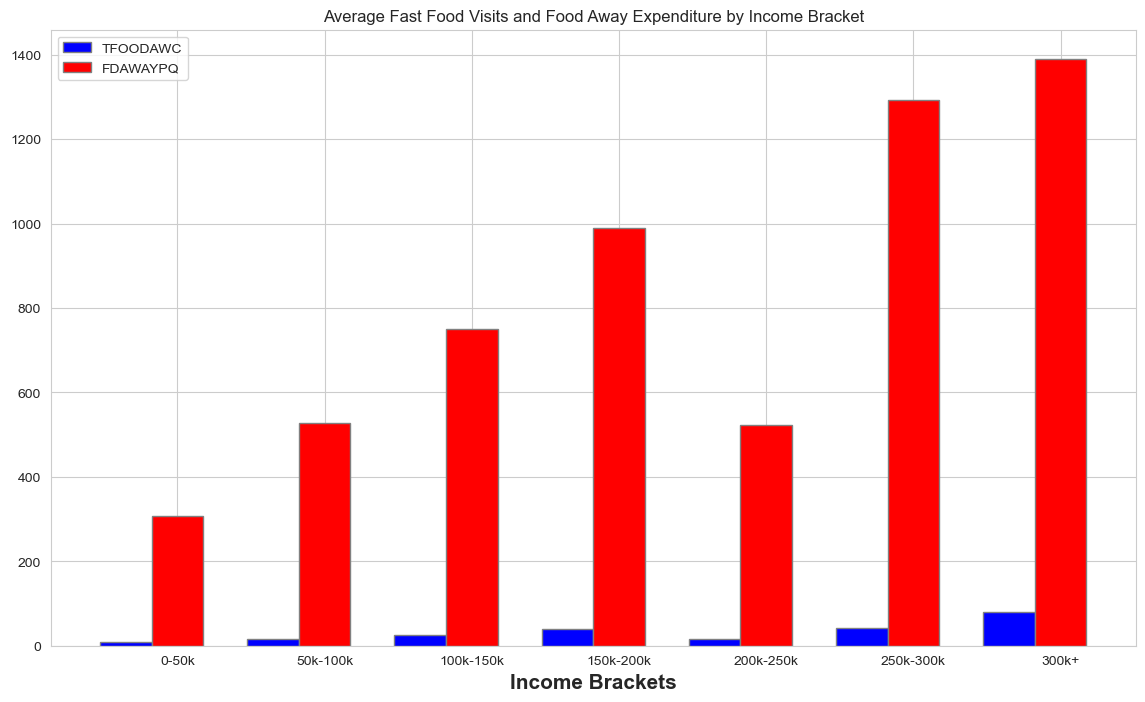

In [32]:

# First, we define income brackets. For simplicity, let's create brackets with equal ranges.
# Adjust the range and bins according to the distribution of the 'Family Income after Taxes' variable.
income_brackets = pd.cut(new_df['Family Income after Taxes'], bins=[0, 50000, 100000, 150000, 200000, 250000, 300000, np.inf], 
                         labels=['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k+'])

# Group by the income brackets and calculate the mean for the two dependent variables
grouped_data = new_df.groupby(income_brackets)['Fast food places during out of town(TFOODAWC)', 'Food Away From Last Quarter (FDAWAYPQ)'].mean().reset_index()

# Now we can plot the grouped bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Define the width of the bars
bar_width = 0.35

# Set position of bar on X axis
r1 = np.arange(len(grouped_data['Fast food places during out of town(TFOODAWC)']))
r2 = [x + bar_width for x in r1]

# Make the plot
plt.bar(r1, grouped_data['Fast food places during out of town(TFOODAWC)'], color='blue', width=bar_width, edgecolor='grey', label='TFOODAWC')
plt.bar(r2, grouped_data['Food Away From Last Quarter (FDAWAYPQ)'], color='red', width=bar_width, edgecolor='grey', label='FDAWAYPQ')

# Add xticks on the middle of the group bars
plt.xlabel('Income Brackets', fontweight='bold', fontsize=15)
plt.xticks([r + bar_width for r in range(len(r1))], grouped_data['Family Income after Taxes'])

# Create legend & Show graphic
plt.legend()
plt.title('Average Fast Food Visits and Food Away Expenditure by Income Bracket')
plt.show()